In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
DataseT = pd.read_csv('car_data.csv')
DataseT.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
DataseT.shape


(301, 9)

In [4]:
DataseT.info()
print(DataseT.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [5]:
print(DataseT.Fuel_Type.value_counts())
print(DataseT.Seller_Type.value_counts())
print(DataseT.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [6]:
DataseT.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
DataseT.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
DataseT.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [7]:
DataseT.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [8]:
X = DataseT.drop(['Car_Name','Selling_Price'],axis=1)
Y = DataseT['Selling_Price']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=2)


In [10]:
from sklearn.linear_model import LinearRegression
lR = LinearRegression()
lR.fit(x_train,y_train)
prediction = lR.predict(x_test)

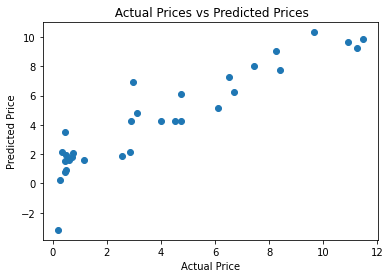

In [11]:
plt.scatter(y_test,prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [12]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("The r2 score is ",r2_score(y_test,prediction))
print("The Mean Absolute Error is ",mean_absolute_error(y_test,prediction))
print("The Mean Squared Error is ",mean_squared_error(y_test,prediction))


The r2 score is  0.8365766715026374
The Mean Absolute Error is  1.1516382156617009
The Mean Squared Error is  2.15012991898452
